## FACE DETECTION ASSIGNMENT

### HOG FEATURES

In [2]:
pip install opencv-python

In [3]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 53kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=ae5c980df8e886d3dbbd51d9541821a3776e7f567d7c37a49f32d2576115a957
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [8]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [80]:
image2 = cv2.imread(r'Two_faces.jpg')

In [81]:
image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB) # Multi-channel
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Single-channel

In [37]:
fd,hog_image = hog(image2, orientations = 8, pixels_per_cell = (16,16), cells_per_block = (1,1),
                   visualize = True, multichannel = True)

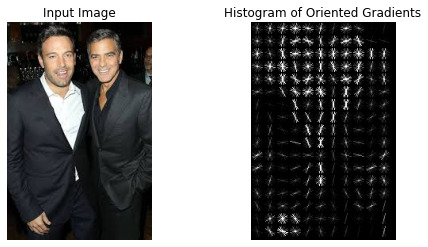

In [38]:
# plot input and hog image

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap = plt.cm.gray)
ax1.set_title('Input Image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range = (0,10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

In [39]:
image.shape

(275, 183, 3)

In [40]:
len(fd)

1496

In [41]:
import face_recognition

from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [42]:
face_locations = face_recognition.face_locations(image)
number_of_faces = len(face_locations)
print('found {} face(s) in input image.'.format(number_of_faces))

found 2 face(s) in input image.


A face is located on pixel location, Top : 31, Left : 45, Bottom : 74, Right : 88
A face is located on pixel location, Top : 31, Left : 98, Bottom : 74, Right : 141


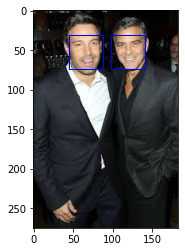

In [43]:
# get axis handle
plt.imshow(image)
ax=plt.gca()

# repeat for all faces found
for face_location in face_locations:
    top,right,bottom,left = face_location
    x,y,w,h = left, top, right, bottom
    print('A face is located on pixel location, Top : {}, Left : {}, Bottom : {}, Right : {}'.format(y,x,h,w))
    rect = Rectangle( (x,y), w-x, h-y, fill = False, color = 'blue')
    ax.add_patch(rect)

plt.show()

##FACE RECOGNITION

In [39]:
import face_recognition

from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

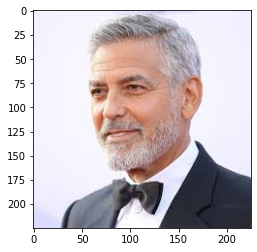

In [52]:
image = cv2.imread('clooooney.jpg')
face_demo = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(face_demo)

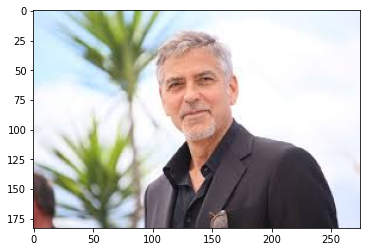

In [54]:
image = cv2.imread('clooney_1.jpg')
clooney = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(clooney)

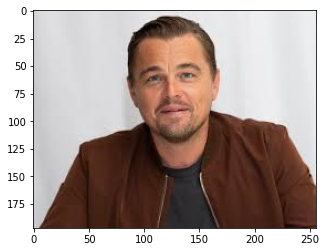

In [57]:
image = cv2.imread('leonardo_1.jpg')
leonardo = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(leonardo)

## FACE ENCODING

In [56]:
face_demo_encoding = face_recognition.face_encodings(face_demo)[0]
clooney_encoding = face_recognition.face_encodings(clooney)[0]
leonardo_encoding = face_recognition.face_encodings(leonardo)[0]

In [44]:
# Create a Database

known_face_encodings = [face_demo_encoding, clooney_encoding, leonardo_encoding]

In [85]:
from google.colab import files
file=files.upload()

Saving woman1.jpg to woman1 (1).jpg


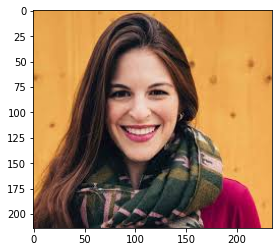

In [86]:
image = cv2.imread('woman1.jpg')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

In [87]:
unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [104]:
from scipy.spatial import distance

for unknown_face_encoding in unknown_face_encodings:
    results=[]
    for known_face_encoding in known_face_encodings:
        d=distance.euclidean(known_face_encoding, unknown_face_encoding)
        results.append(d)
    threshold = 0.6
    results = np.array(results)<=threshold
    name = 'Unknown'
    if results[0]:
        name = 'Face_demo'
    if results[1]:
        name = 'Clooney'
    if results[2]>=threshold:
        name = 'Leonardo'
    else:
        name = 'unknown'
    print(f'Found {name} in photo!')

Found unknown in photo!


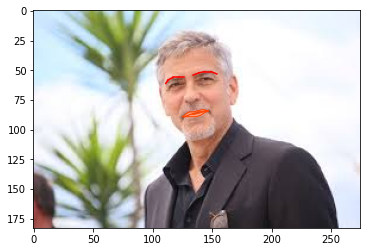

In [84]:
face_landmarks_list = face_recognition.face_landmarks(clooney)

import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(clooney)

ax = plt.gca()

for face_landmarks in face_landmarks_list:
  left_eyebrow_pts = face_landmarks['left_eyebrow']
  pre_x, pre_y = left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x,x], [pre_y,y], color='red')
    ax.add_line(l)
    pre_x,pre_y = x,y

  right_eyebrow_pts = face_landmarks['right_eyebrow']
  pre_x, pre_y = right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x,x], [pre_y,y], color='red')
    ax.add_line(l)
    pre_x,pre_y = x,y

  p = Polygon(face_landmarks['top_lip'], facecolor = 'lightsalmon', edgecolor='orangered')
  ax.add_patch(p)
  p = Polygon(face_landmarks['bottom_lip'], facecolor = 'lightsalmon', edgecolor='orangered')
  ax.add_patch(p)
  
plt.show()


### Thank You! My name is Pradyum Soni